<a href="https://colab.research.google.com/github/Praveen8824/Using-Logistic-Regression-Diabetic-Prediction-/blob/main/Diabetic_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount google drive
df= pd.read_csv('/content/drive/MyDrive/Parul University/Parul University || Essential of ML/ML code || shared with Student/AllDataSet/diabetes.csv')

In [ ]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [ ]:
# EDA
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
# count of null value
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

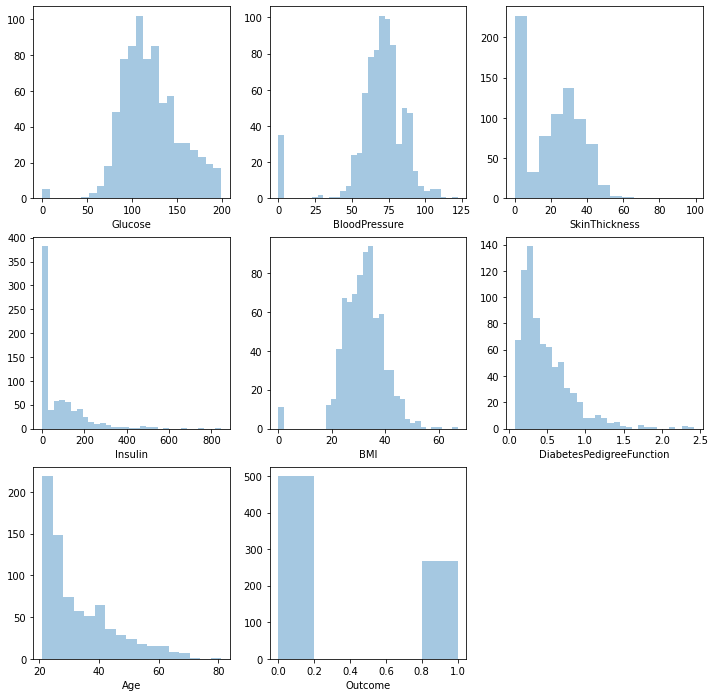

In [ ]:
# Histogram
col = df.columns
plt.figure(figsize=(12,12))
for i in range(len(col)):
  plt.subplot(3,3,i+1)
  sns.distplot(df[col[i]],kde=False)
plt.show()
# conclusion
# Glucose : we have more datapoint around 100
# Blood pressure :we have more datapoint around 75

In [ ]:
# Now focus on diabetic 1 , and non diabetic o
df_d = df[df.Outcome==1]
df_nd = df[df.Outcome==0]

In [ ]:
df_d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
2,183,64,0,0,23.3,0.672,32,1
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
8,197,70,45,543,30.5,0.158,53,1


In [ ]:
df_nd.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,85,66,29,0,26.6,0.351,31,0
3,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
7,115,0,0,0,35.3,0.134,29,0
10,110,92,0,0,37.6,0.191,30,0


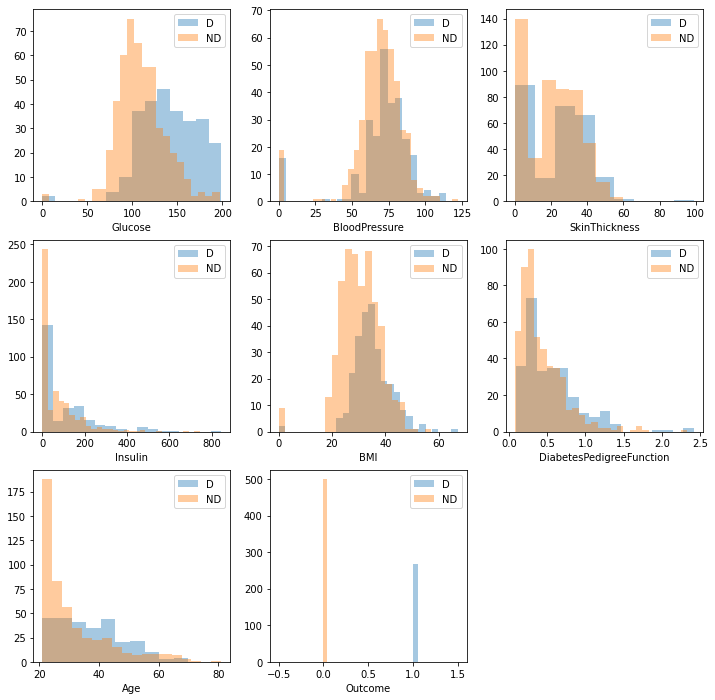

In [ ]:
# analyse data more deeply
col = df.columns
plt.figure(figsize=(12,12))
for i in range(len(col)):
  plt.subplot(3,3,i+1)
  sns.distplot(df_d[col[i]],kde=False, label='D')
  sns.distplot(df_nd[col[i]],kde=False, label='ND')
  plt.legend()
plt.show()

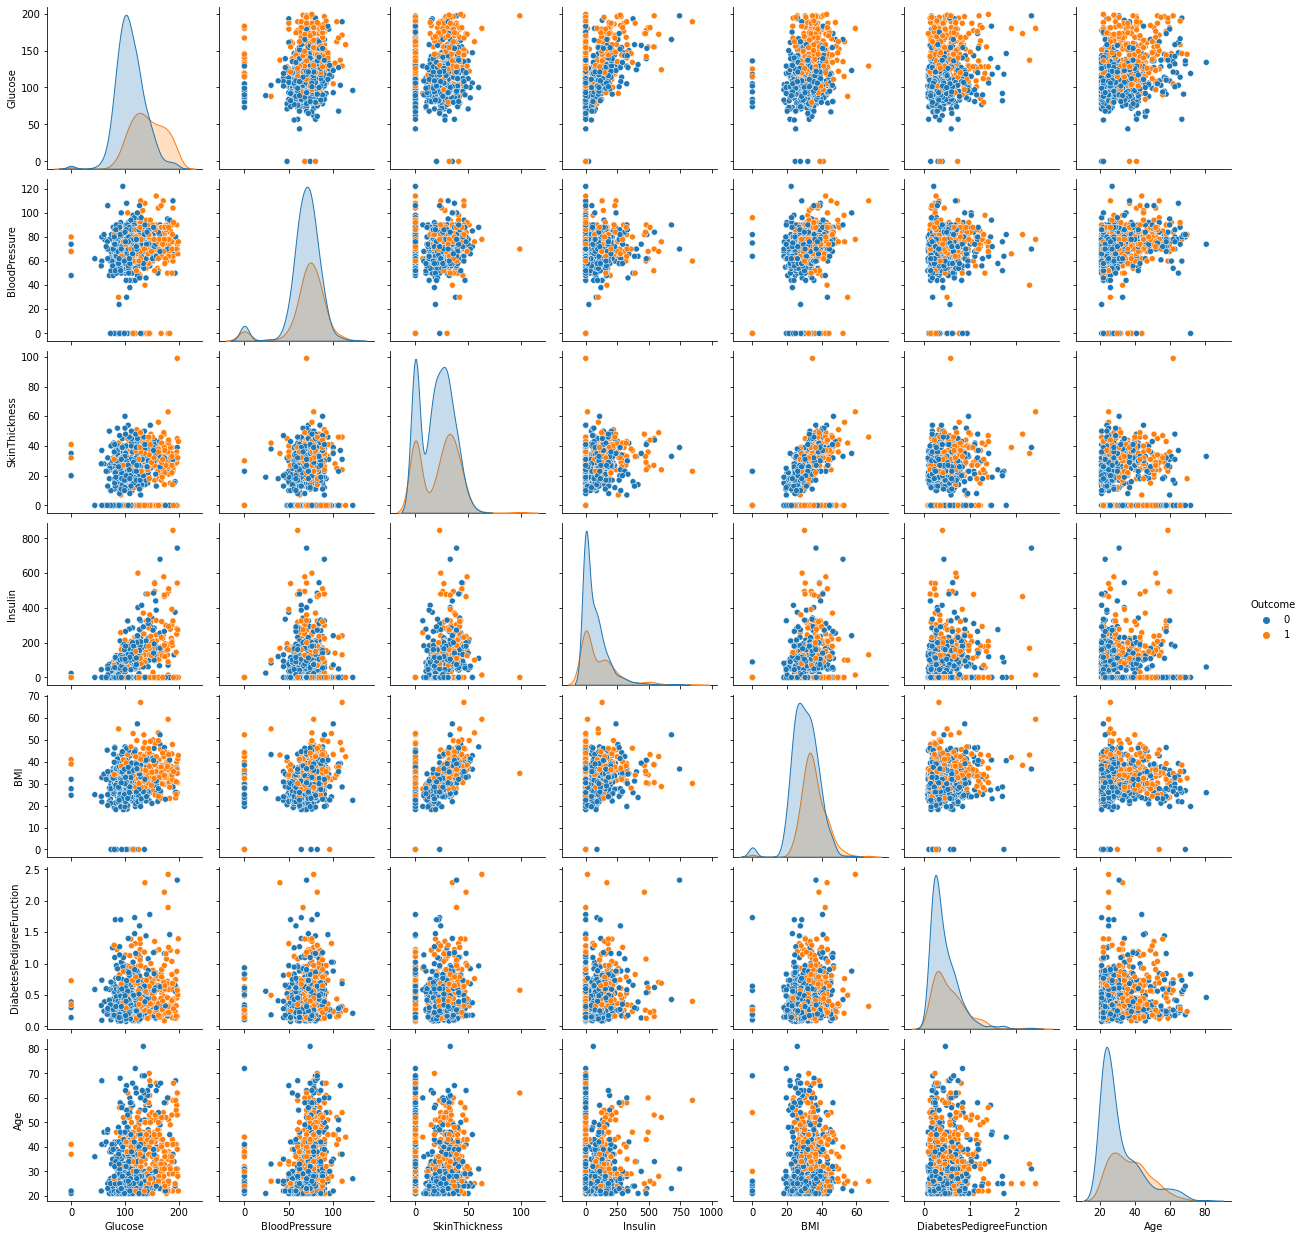

In [ ]:
# pair plot
sns.pairplot(df , hue = 'Outcome')

In [ ]:
# value count
# 1 using pandas
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

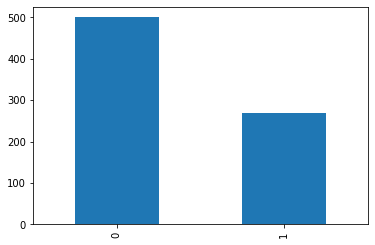

In [ ]:
df.Outcome.value_counts().plot(kind='bar')

In [ ]:
df.Glucose.value_counts().head()

99     17
100    17
111    14
129    14
125    14
Name: Glucose, dtype: int64

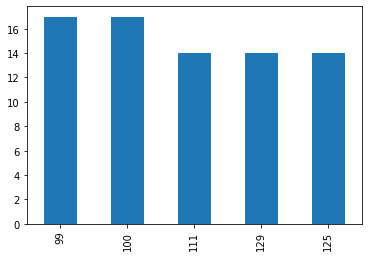

In [ ]:
df.Glucose.value_counts().head().plot(kind='bar')

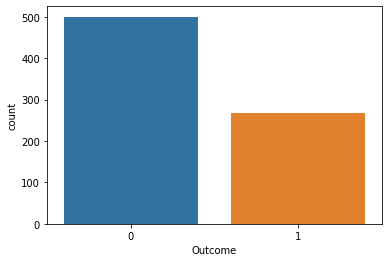

In [ ]:
# 2 :count plot
sns.countplot(x='Outcome', data=df)

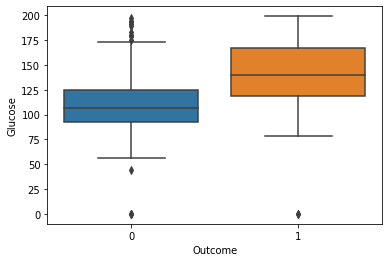

In [ ]:
# box plot
sns.boxplot(x='Outcome', y='Glucose', data=df)

In [ ]:
# conclusion : we observe that for non diabetic (0) people have less glucose range compare to diacetic(1)

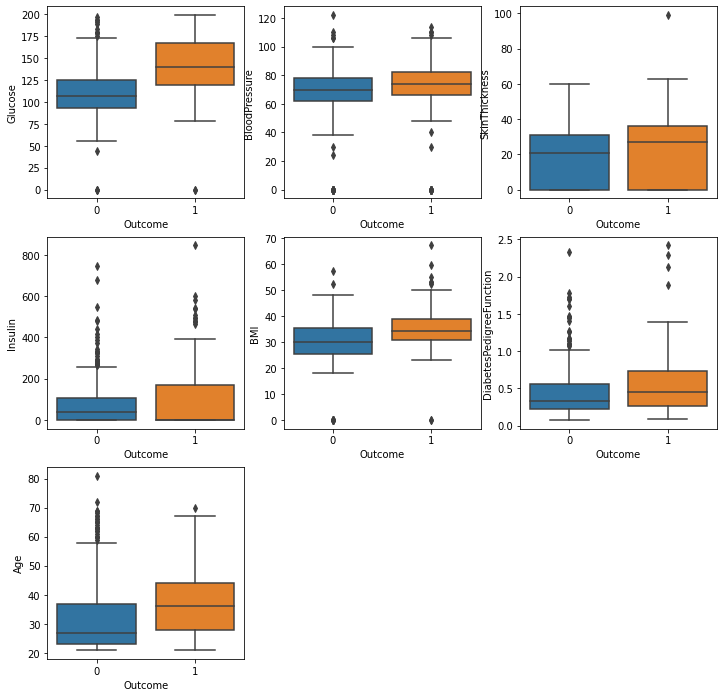

In [ ]:
# i need to analyse to column with respect to Outcome

col = df.columns
plt.figure(figsize=(12,12))
for i in range(len(col)-1):
  plt.subplot(3,3,i+1)
  sns.boxplot(x='Outcome', y=col[i], data=df)
plt.show()

In [ ]:
# Model creation
# split feature and outcome
x = df.iloc[:,0:7]
y= df.iloc[:,7:]

In [ ]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.4,random_state=56)

In [ ]:
x_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
512,91,68,0,0,24.2,0.200,58
279,108,62,10,278,25.3,0.881,22
451,134,70,0,0,28.9,0.542,23
620,112,86,42,160,38.4,0.246,28
554,84,64,23,115,36.9,0.471,28


In [ ]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
model= LogisticRegression()

In [ ]:
# train the model
model.fit(x_train , y_train)

LogisticRegression()

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [ ]:
# How i got the prediction on new data
#Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
Glucose= int(input('Enter the Glucose :'))
BloodPressure= int(input('Enter the BloodPressure :'))
SkinThickness= int(input('Enter the SkinThickness :'))
Insulin= int(input('Enter the Insulin :'))
BMI= float(input('Enter the BMI :'))
DiabetesPedigreeFunction= float(input('Enter the DiabetesPedigreeFunction :'))
Age= int(input('Enter the Age :'))

mypred = model.predict([[Glucose,BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction,	Age]])
if mypred==1:
  print('Diabetic')
else:
  print('Non-Diabetic')

Enter the Glucose :127
Enter the BloodPressure :80
Enter the SkinThickness :36
Enter the Insulin :40
Enter the BMI :31.2
Enter the DiabetesPedigreeFunction :0.333
Enter the Age :34
Non-Diabetic


## **Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Accuracy of Model :' , accuracy_score(y_test,pred))

Accuracy of Model : 0.8181818181818182


In [ ]:
confusion_matrix(y_test,pred)

array([[193,  20],
       [ 36,  59]])

In [ ]:
#  precision_score
#  recall_score
#  f1_score

In [ ]:
# analysis how random state impacting on my model accuacy ======== V.imp
accu=[]
rs =[]
for i in range(1,101):
  x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x, y, test_size=0.4,random_state=i)
  rs.append(i)
  model1= LogisticRegression()
  model1.fit(x_train1 , y_train1)
  pred1 = model1.predict(x_test1)
  # store accuracy score in a list- accu
  accu.append(accuracy_score(y_test1,pred1)*100)

In [ ]:
accu

[76.2987012987013,
 76.94805194805194,
 74.67532467532467,
 80.84415584415584,
 77.92207792207793,
 75.64935064935064,
 79.87012987012987,
 79.87012987012987,
 75.97402597402598,
 75.97402597402598,
 76.62337662337663,
 77.59740259740259,
 76.94805194805194,
 76.2987012987013,
 77.59740259740259,
 75.32467532467533,
 75.64935064935064,
 76.2987012987013,
 76.94805194805194,
 76.94805194805194,
 72.72727272727273,
 75.32467532467533,
 76.2987012987013,
 73.7012987012987,
 78.57142857142857,
 74.35064935064936,
 78.8961038961039,
 77.27272727272727,
 75.0,
 78.24675324675324,
 76.62337662337663,
 78.57142857142857,
 75.97402597402598,
 77.27272727272727,
 76.62337662337663,
 76.2987012987013,
 78.8961038961039,
 73.05194805194806,
 76.2987012987013,
 77.27272727272727,
 76.2987012987013,
 75.0,
 79.87012987012987,
 78.24675324675324,
 77.27272727272727,
 76.62337662337663,
 76.94805194805194,
 77.59740259740259,
 75.0,
 74.67532467532467,
 77.59740259740259,
 75.32467532467533,
 75.32467

In [ ]:
# make a tbale using datafream
result = pd.DataFrame({'RandomState': rs, 'AccuracyScore':accu})

In [ ]:
result.iloc[30:75,:]

,RandomState,AccuracyScore
30,31,76.623377
31,32,78.571429
32,33,75.974026
33,34,77.272727
34,35,76.623377
35,36,76.298701
36,37,78.896104
37,38,73.051948
38,39,76.298701
39,40,77.272727


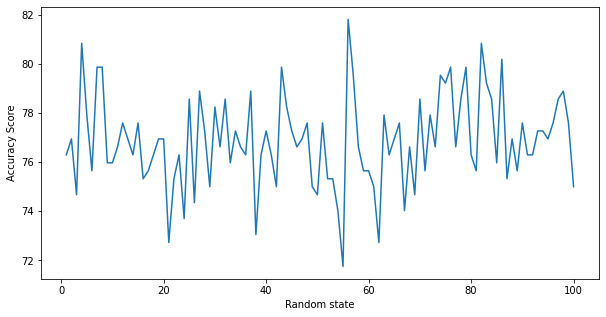

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(rs,accu)
plt.xlabel('Random state')
plt.ylabel('Accuracy Score')
plt.show()